In [1]:
library('C50')

In [3]:
data('churn')

In [4]:
ls()

[1] "churnTest"  "churnTrain"

In [5]:
str(churnTrain)

'data.frame':	3333 obs. of  20 variables:
 $ state                        : Factor w/ 51 levels "AK","AL","AR",..: 17 36 32 36 37 2 20 25 19 50 ...
 $ account_length               : int  128 107 137 84 75 118 121 147 117 141 ...
 $ area_code                    : Factor w/ 3 levels "area_code_408",..: 2 2 2 1 2 3 3 2 1 2 ...
 $ international_plan           : Factor w/ 2 levels "no","yes": 1 1 1 2 2 2 1 2 1 2 ...
 $ voice_mail_plan              : Factor w/ 2 levels "no","yes": 2 2 1 1 1 1 2 1 1 2 ...
 $ number_vmail_messages        : int  25 26 0 0 0 0 24 0 0 37 ...
 $ total_day_minutes            : num  265 162 243 299 167 ...
 $ total_day_calls              : int  110 123 114 71 113 98 88 79 97 84 ...
 $ total_day_charge             : num  45.1 27.5 41.4 50.9 28.3 ...
 $ total_eve_minutes            : num  197.4 195.5 121.2 61.9 148.3 ...
 $ total_eve_calls              : int  99 103 110 88 122 101 108 94 80 111 ...
 $ total_eve_charge             : num  16.78 16.62 10.3 5.26 12.61 ...

In [6]:
str(churnTest)

'data.frame':	1667 obs. of  20 variables:
 $ state                        : Factor w/ 51 levels "AK","AL","AR",..: 12 27 36 33 41 13 29 19 25 44 ...
 $ account_length               : int  101 137 103 99 108 117 63 94 138 128 ...
 $ area_code                    : Factor w/ 3 levels "area_code_408",..: 3 3 1 2 2 2 2 1 3 2 ...
 $ international_plan           : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ voice_mail_plan              : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 2 ...
 $ number_vmail_messages        : int  0 0 29 0 0 0 32 0 0 43 ...
 $ total_day_minutes            : num  70.9 223.6 294.7 216.8 197.4 ...
 $ total_day_calls              : int  123 86 95 123 78 85 124 97 117 100 ...
 $ total_day_charge             : num  12.1 38 50.1 36.9 33.6 ...
 $ total_eve_minutes            : num  212 245 237 126 124 ...
 $ total_eve_calls              : int  73 139 105 88 101 68 125 112 46 89 ...
 $ total_eve_charge             : num  18 20.8 20.2 10.7 10.5 ...
 $ tota

In [11]:
var_list = !names(churnTrain) %in% c('state','account_length','area_code')

In [13]:
churnTrain =churnTrain[,var_list]

In [15]:
churnTest = churnTest[,var_list]

In [16]:
str(churnTrain)

'data.frame':	3333 obs. of  17 variables:
 $ international_plan           : Factor w/ 2 levels "no","yes": 1 1 1 2 2 2 1 2 1 2 ...
 $ voice_mail_plan              : Factor w/ 2 levels "no","yes": 2 2 1 1 1 1 2 1 1 2 ...
 $ number_vmail_messages        : int  25 26 0 0 0 0 24 0 0 37 ...
 $ total_day_minutes            : num  265 162 243 299 167 ...
 $ total_day_calls              : int  110 123 114 71 113 98 88 79 97 84 ...
 $ total_day_charge             : num  45.1 27.5 41.4 50.9 28.3 ...
 $ total_eve_minutes            : num  197.4 195.5 121.2 61.9 148.3 ...
 $ total_eve_calls              : int  99 103 110 88 122 101 108 94 80 111 ...
 $ total_eve_charge             : num  16.78 16.62 10.3 5.26 12.61 ...
 $ total_night_minutes          : num  245 254 163 197 187 ...
 $ total_night_calls            : int  91 103 104 89 121 118 118 96 90 97 ...
 $ total_night_charge           : num  11.01 11.45 7.32 8.86 8.41 ...
 $ total_intl_minutes           : num  10 13.7 12.2 6.6 10.1 6.3 7.5 7.1

In [40]:
set.seed(2)
ind = sample(x=c(1,2),size=nrow(churnTrain),replace=T,prob=c(0.7,0.3))

In [41]:
trainset = churnTrain[ind == 1,]

In [42]:
validationset = churnTrain[ind == 2,]

In [43]:
library(rpart)

In [44]:
churn.rp = rpart(churn~.,data=trainset,control=rpart.control(minsplit=20))

In [58]:
s =summary(churn.rp)

Call:
rpart(formula = churn ~ ., data = trainset, control = rpart.control(minsplit = 20))
  n= 2315 

          CP nsplit rel error    xerror       xstd
1 0.07602339      0 1.0000000 1.0000000 0.04992005
2 0.07456140      2 0.8479532 0.9970760 0.04985964
3 0.05555556      4 0.6988304 0.7602339 0.04442127
4 0.02631579      7 0.4941520 0.5263158 0.03767329
5 0.02339181      8 0.4678363 0.5204678 0.03748096
6 0.02046784     10 0.4210526 0.5087719 0.03709209
7 0.01754386     11 0.4005848 0.4707602 0.03578773
8 0.01000000     12 0.3830409 0.4766082 0.03599261

Variable importance
            total_day_minutes              total_day_charge 
                           18                            18 
number_customer_service_calls            total_intl_minutes 
                           10                             8 
            total_intl_charge              total_eve_charge 
                            8                             8 
            total_eve_minutes            internation

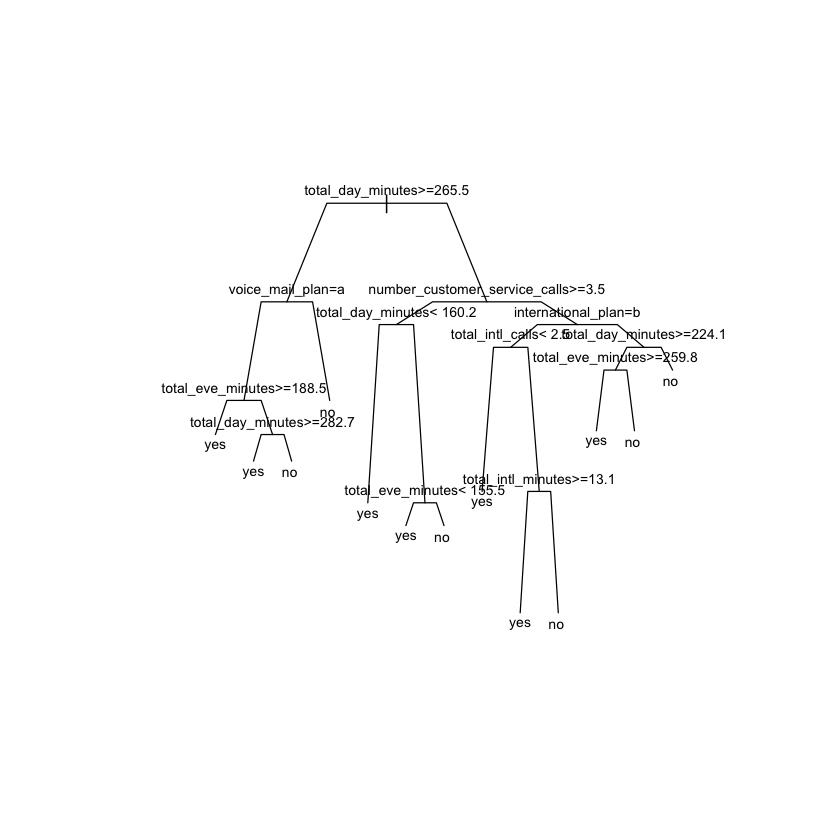

In [46]:
plot(churn.rp,margin=0.2,branch=0.6)
text(churn.rp,cex=0.7)

In [38]:
#install.packages('rpart.plot')
library('rpart.plot')

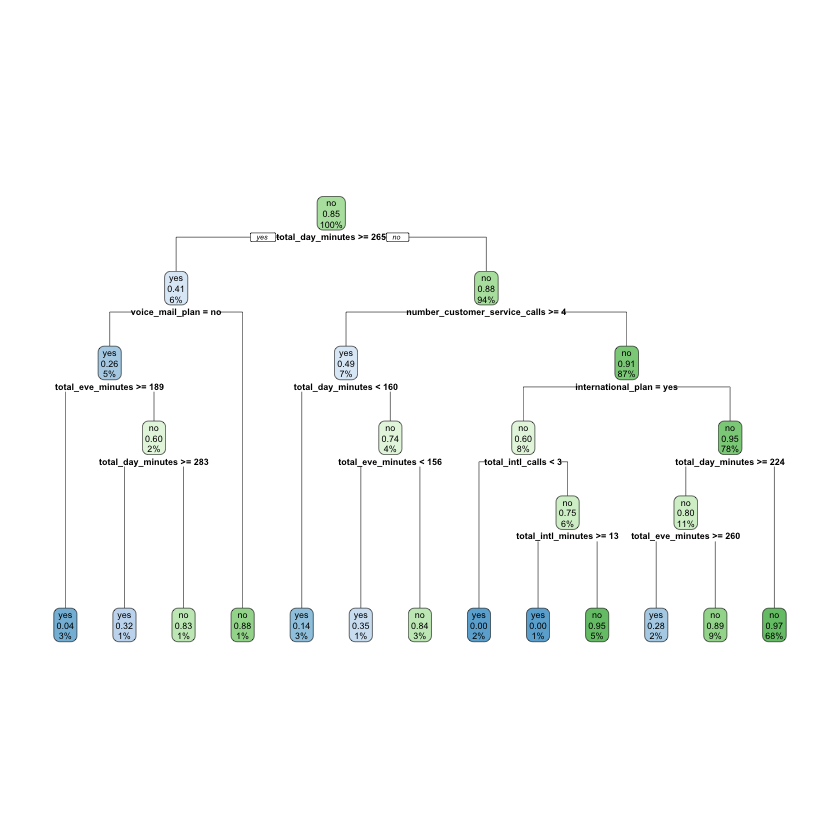

In [39]:
rpart.plot(churn.rp)

In [59]:
s$cptable

,CP,nsplit,rel error,xerror,xstd
1,0.07602339,0,1.0000000,1.0000000,0.04992005
2,0.07456140,2,0.8479532,0.9970760,0.04985964
3,0.05555556,4,0.6988304,0.7602339,0.04442127
4,0.02631579,7,0.4941520,0.5263158,0.03767329
5,0.02339181,8,0.4678363,0.5204678,0.03748096
6,0.02046784,10,0.4210526,0.5087719,0.03709209
7,0.01754386,11,0.4005848,0.4707602,0.03578773
8,0.01000000,12,0.3830409,0.4766082,0.03599261


In [61]:
printcp(churn.rp)


Classification tree:
rpart(formula = churn ~ ., data = trainset, control = rpart.control(minsplit = 20))

Variables actually used in tree construction:
[1] international_plan            number_customer_service_calls
[3] total_day_minutes             total_eve_minutes            
[5] total_intl_calls              total_intl_minutes           
[7] voice_mail_plan              

Root node error: 342/2315 = 0.14773

n= 2315 

        CP nsplit rel error  xerror     xstd
1 0.076023      0   1.00000 1.00000 0.049920
2 0.074561      2   0.84795 0.99708 0.049860
3 0.055556      4   0.69883 0.76023 0.044421
4 0.026316      7   0.49415 0.52632 0.037673
5 0.023392      8   0.46784 0.52047 0.037481
6 0.020468     10   0.42105 0.50877 0.037092
7 0.017544     11   0.40058 0.47076 0.035788
8 0.010000     12   0.38304 0.47661 0.035993


In [70]:
min_row = which.min(s$cptable[,'xerror'])

In [72]:
churn.cp = s$cptable[min_row,'CP']

In [73]:
prune.rp =prune(churn.rp,cp=churn.cp )

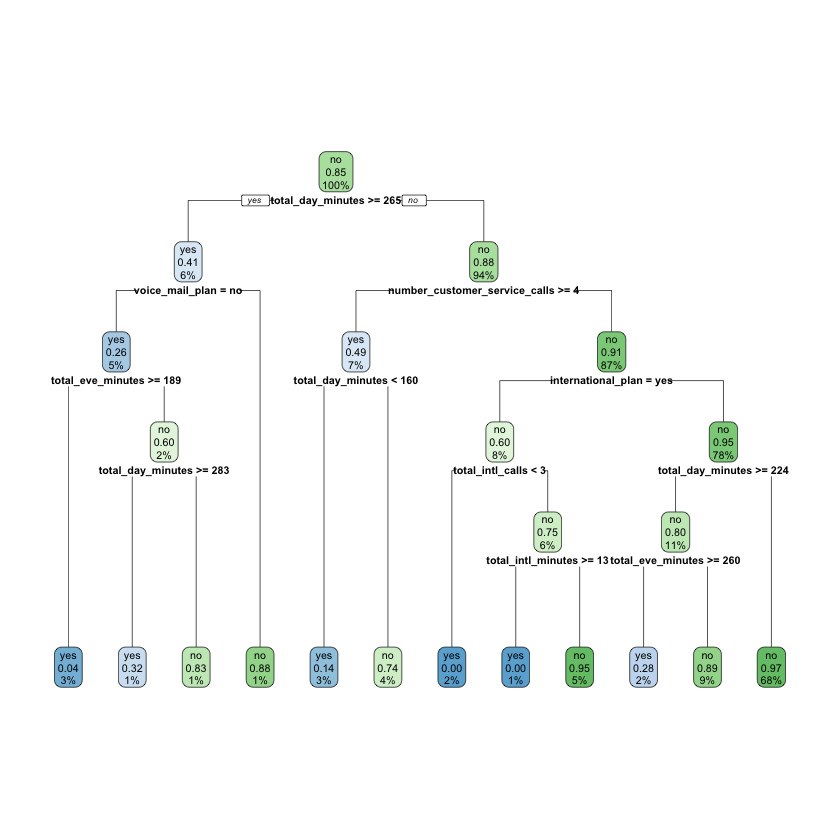

In [74]:
rpart.plot(prune.rp)

In [77]:
predictions = predict(prune.rp,validationset,type='class')

In [78]:
predictions

2    5    6    8   13   16   17   23   29   33   34   37   41   45   46   47 
  no   no   no   no   no  yes   no   no   no   no   no   no   no   no   no   no 
  50   54   56   57   58   60   61   62   65   76   78   86   87   89   91  103 
  no   no   no   no   no   no   no   no   no   no  yes   no  yes   no   no   no 
 104  107  112  115  116  117  119  123  124  126  132  134  138  146  153  155 
  no   no   no   no  yes   no   no   no   no   no   no   no   no   no   no   no 
 157  161  162  164  168  171  174  176  181  183  184  186  188  193  201  204 
 yes   no   no   no   no   no   no   no   no   no   no   no  yes   no   no   no 
 206  211  213  215  222  226  227  229  230  233  235  241  244  245  246  251 
  no   no   no  yes   no   no   no   no   no   no   no   no   no   no   no  yes 
 255  261  265  269  271  272  273  275  277  282  286  289  293  295  301  304 
  no   no   no   no   no   no   no   no   no   no   no   no   no   no   no   no 
 305  309  313  319  332  333  339  340  341  342  343  348  354  356  357  369 
  no   no   no   no  yes  yes  yes   no   no   no   no   no   no   no   no   no 
 371  378  389  390  391  392  398  400  405  406  410  412  417  420  421  425 
  no   no   no   no   no   no  yes   no   no   no   no   no  yes   no   no   no 
 432  433  436  438  439  443  447  452  455  456  458  459  461  466  468  476 
  no   no   no   no   no   no   no   no  yes   no   no   no   no  yes   no   no 
 480  482  483  484  485  487  489  490  494  498  506  509  517  520  521  524 
  no   no   no   no   no   no   no   no   no   no   no   no   no   no   no   no 
 530  532  533  536  537  540  542  544  548  550  551  555  560  561  563  565 
  no   no   no   no   no   no   no   no  yes   no   no   no   no   no   no   no 
 569  571  573  574  576  577  583  586  589  590  596  605  609  611  615  617 
 yes   no   no   no   no   no   no   no  yes   no   no   no   no   no   no   no 
 620  628  633  642  643  645  648  651  653  655  657  661  664  667  669  673 
 yes   no   no   no   no   no   no   no   no   no   no  yes   no   no   no   no 
 676  677  678  689  695  697  701  702  703  707  709  711  715  717  721  722 
  no   no   no   no  yes   no   no   no   no   no   no   no   no   no   no  yes 
 723  726  728  734  735  743  747  754  755  759  760  764  769  777  778  779 
  no   no   no   no   no   no   no   no   no   no   no   no   no   no   no   no 
 783  785  787  792  795  798  799  800  806  809  814  817  820  830  833  837 
  no   no   no   no   no  yes   no   no   no   no   no   no   no   no  yes   no 
 838  841  845  846  847  849  851  853  855  858  864  866  867  868  874  890 
  no   no   no   no   no   no   no   no   no   no   no   no   no   no   no   no 
 892  895  906  908  909  915  917  922  929  932  934  937  938  941  943  945 
  no  yes   no   no   no  yes   no   no   no   no  yes   no   no   no   no   no 
 946  954  956  962  966  968  969  974  978  981  985  988  992  998 1003 1008 
  no   no   no   no   no   no   no   no  yes   no   no   no   no   no   no   no 
1011 1015 1019 1022 1026 1027 1030 1033 1034 1035 1036 1039 1043 1044 1048 1050 
  no   no   no   no  yes   no   no   no   no   no   no  yes   no   no   no   no 
1051 1053 1054 1057 1065 1067 1068 1072 1073 1076 1077 1079 1086 1087 1091 1094 
  no   no   no   no   no   no   no   no   no   no   no  yes   no   no   no   no 
1099 1103 1105 1107 1108 1111 1112 1115 1117 1120 1121 1125 1131 1132 1133 1135 
  no   no   no   no   no   no   no   no   no   no   no   no   no   no   no   no 
1136 1137 1141 1142 1143 1144 1146 1148 1149 1150 1153 1157 1159 1160 1163 1164 
  no   no   no   no  yes   no   no   no   no   no   no   no   no   no   no   no 
1167 1172 1174 1179 1186 1188 1190 1193 1209 1211 1212 1214 1215 1216 1217 1222 
  no   no   no   no   no   no   no   no   no   no   no   no   no   no   no   no 
1224 1226 1227 1228 1232 1233 1236 1242 1243 1246 1249 1252 1256 1257 1260 1262 
  no   no   no   no  yes   no   no

In [82]:
sum(validationset$churn == predictions) / nrow(validationset)

[1] 0.9410609

In [83]:
table(predictions,validationset$churn)

           
predictions yes  no
        yes  95  14
        no   46 863

In [84]:
#install.packages('caret')
#install.packages('e1071')
library('caret')
library('e1071')

Loading required package: lattice
Loading required package: ggplot2


In [85]:
confusionMatrix(table(predictions,validationset$churn))

Confusion Matrix and Statistics

           
predictions yes  no
        yes  95  14
        no   46 863
                                          
               Accuracy : 0.9411          
                 95% CI : (0.9248, 0.9547)
    No Information Rate : 0.8615          
    P-Value [Acc > NIR] : 2.786e-16       
                                          
                  Kappa : 0.727           
 Mcnemar's Test P-Value : 6.279e-05       
                                          
            Sensitivity : 0.67376         
            Specificity : 0.98404         
         Pos Pred Value : 0.87156         
         Neg Pred Value : 0.94939         
             Prevalence : 0.13851         
         Detection Rate : 0.09332         
   Detection Prevalence : 0.10707         
      Balanced Accuracy : 0.82890         
                                          
       'Positive' Class : yes             
                                          

In [88]:
confusionMatrix(table(predict(prune.rp,churnTest,type='class'),churnTest$churn))

Confusion Matrix and Statistics

     
       yes   no
  yes  147   17
  no    77 1426
                                          
               Accuracy : 0.9436          
                 95% CI : (0.9314, 0.9542)
    No Information Rate : 0.8656          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7267          
 Mcnemar's Test P-Value : 1.162e-09       
                                          
            Sensitivity : 0.65625         
            Specificity : 0.98822         
         Pos Pred Value : 0.89634         
         Neg Pred Value : 0.94877         
             Prevalence : 0.13437         
         Detection Rate : 0.08818         
   Detection Prevalence : 0.09838         
      Balanced Accuracy : 0.82223         
                                          
       'Positive' Class : yes             
                                          